# D209: Data Mining I - Task 1: Classification Analysis
***

### By: Leng Yang
### Student ID: 012298452
### Date: August 27, 2024
***
<br>
<br>
<br>

## Table of Contents
* [A1. Proposal of Question](#A1)
* [A2. Defined Goal](#A2)
* [B1. Explanation of Classification Method](#B1)
* [B2. Summary of Method Assumption](#B2)
* [B3. Packages or Libraries List](#B3)
* [C1. Data Preprocessing](#C1)
* [C2. Data Set Variables](#C2)
* [C3. Steps for Analysis](#C3)
* [C4. Cleaned Data Set](#C4)
* [D1. Splitting the Data](#D1)
* [D2. Output and Intermediate Calculations](#D2)
* [D3. Code Execution](#D3)
* [E1. Accuracy and AUC](#E1)
* [E2. Results and Implications](#E2)
* [E3. Limitation](#E3)
* [E4. Course of Action](#E4)
* [F. Panopto Recording](#F)
* [G. Sources for Third-Party Code](#G)
* [H. Sources](#H)

<BR>

## A1. Proposal of Question <a class="anchor" id="A1"></a>

The research question for this paper is: Can hospital readmissions be predicted from patient medical conditions using a k-nearest neighbors (k-NN) classification model?

<BR>

## A2. Defined Goal <a class="anchor" id="A2"></a>

This analysis uses patient medical conditions and a k-NN method to predict whether patients would be later readmitted to hospitals. Patient care aims to reduce hospital visits, ensuring the best care possible is given on the initial visit. As such, this analysis would assist the business, when accounting for existing medical conditions, in structuring care plans to reduce further readmissions.

<BR>

## B1. Explanation of Classification Method <a class="anchor" id="B1"></a>

The k-NN method labels new data by looking at the nearest, surrounding labeled data in a feature space. The "k" in the k-NN method determines how many of the closest neighbors to use as a decision metric and then labels the new data based on the majority of those closest neighbors, like in a majority poll. Additionally, to determine which neighbors are closest, the method calculates the distance between the unlabeled data point and all other data points using a distance metric such as Euclidean distance, which measures a straight line between the points (IBM, 2021). Besides Euclidean distance, other distance metrics, such as Manhattan, Minkowski, Hamming distance, and others, can be used. Different combinations of the number of neighbors and distance metrics can be tested to select the combination that best predicts the unlabeled data. For this analysis a testing set will be used that acts as out-of-sample data. The model will use the data in this set to look at already known and labeled data points and then label the testing data according to how the model was trained. The expected outcome is to have test data classified based on their nearest neighbors with at least a model accuracy of 95%.

<BR>

## B2. Summary of Method Assumption <a class="anchor" id="B2"></a>

One of the central assumptions of the k-NN method is that the data exists in a feature space that can be measured by distance metrics such as Euclidean or Manhattan distances (Vishalmendekarhere, 2021). This is core to how k-NN functions because the method uses these calculated distances in the existing feature space to label new data based on a select number of nearest labeled data. In other words, labeled data points close to the new data point can be said to be similar, so the new data takes on the same label as those data points. Without this assumption, the k-NN method would fail to function correctly.

<BR>

## B3. Packages or Libraries List <a class="anchor" id="B3"></a>

Listed are the Python packages and libraries used in assistance for this analysis:
* Pandas: used to load the data into a tabular dataframe and for data manipulation
* NumPy: used for matrix and mathematical calculations
* Matplotlib and Seaborn are both used for visualizations
* Sklearn provides several libraries that aid significantly in this analysis:
    * KNeighborsClassifier is used as the main algorithm and classification model for this analysis 
    * train_test_split is used to split the data into training and testing sets
    * confusion_matrix is used to generate a confusion matrix from the model
    * roc_auc_score is used to calculate the area under the curve (AUC) score of the model
    * roc_curve is used to plot the receiver operating characteristic (ROC) curve of the model

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [20]:
#Print working versions
from platform import python_version
print("python:", python_version())
print("pandas:", pd.__version__)
print("numpy:", np.__version__)

python: 3.11.7
pandas: 2.1.4
numpy: 1.26.4


<BR>

## C1. Data Preprocessing <a class="anchor" id="C1"></a>

One data preprocessing step will include encoding the categorical predictors of interest. Since k-NN uses distance metrics for calculations, it does not make sense to leave the values of the categorical variables in their natural state, namely as "Yes/No" data; as such, text data can't be computed. Instead, this data will be transformed into 1/0s to replace Yes/No's.

<BR>

## C2. Data Set Variables <a class="anchor" id="C2"></a>

Since this analysis will focus on the medical conditions, all data types are categorical, including the response variable. Listed below are the variables and the data type for completeness.
* High blood pressure: Categorical
* Stroke: Categorical
* Overweight: Categorical
* Arthritis: Categorical
* Diabetes: Categorical
* Hyperlipidemia: Categorical
* Back pain: Categorical
* Anxiety: Categorical
* Allergic rhinitis: Categorical
* Reflux esophagitis: Categorical
* Asthma: Categorical
* Hospital Readmission: Categorical

<BR>

## C3. Steps for Analysis <a class="anchor" id="C3"></a>

The data will first be loaded into a Pandas dataframe, and the column names will be reformatted using snake case for consistency. Afterward, the data will be inspected to ensure no missing values or outliers need to be imputed if required for this analysis. Next, only the relevant data is kept, and all others are dropped, as identified in the section above. Afterwards, the data will be explored.

Once data cleaning and exploration are complete, the data can be preprocessed before modeling. The primary preprocessing step will include encoding the values of all variables, which are "Yes/No" values, into 1/0's. Once complete, the data set is ready to be used for modeling.

In [30]:
#Read data file into dataframe
df = pd.read_csv('medical_clean.csv')

In [31]:
# Standardize column names using snake_case and re-express names for comprehensiveness (Yang, 2024).
col_names = ['case_order', 'customer_id', 'interaction', 'uid', 'city', 'state', 'county', 'zip', 'latitude', 'longitude',
             'population', 'area', 'timezone', 'job', 'children', 'age', 'income', 'marital', 'gender', 'readmission', 
             'vit_d_level', 'doc_visits', 'full_meals_eaten', 'vit_d_supp', 'soft_drink', 'initial_admin', 'high_blood', 'stroke', 'complication_risk', 'overweight',
             'arthritis', 'diabetes', 'hyperlipidemia', 'back_pain', 'anxiety', 'allergic_rhinitis', 'reflux_esophagitis', 'asthma', 'services', 'initial_days', 
             'total_charge', 'additional_charges', 'item_1', 'item_2', 'item_3', 'item_4', 'item_5', 'item_6', 'item_7', 'item_8']
df.columns = col_names
df.head()

,case_order,customer_id,interaction,uid,city,state,county,zip,latitude,longitude,population,area,timezone,job,children,age,income,marital,gender,readmission,vit_d_level,doc_visits,full_meals_eaten,vit_d_supp,soft_drink,initial_admin,high_blood,stroke,complication_risk,overweight,arthritis,diabetes,hyperlipidemia,back_pain,anxiety,allergic_rhinitis,reflux_esophagitis,asthma,services,initial_days,total_charge,additional_charges,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [32]:
#Check for missing values and initial data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   case_order          10000 non-null  int64  
 1   customer_id         10000 non-null  object 
 2   interaction         10000 non-null  object 
 3   uid                 10000 non-null  object 
 4   city                10000 non-null  object 
 5   state               10000 non-null  object 
 6   county              10000 non-null  object 
 7   zip                 10000 non-null  int64  
 8   latitude            10000 non-null  float64
 9   longitude           10000 non-null  float64
 10  population          10000 non-null  int64  
 11  area                10000 non-null  object 
 12  timezone            10000 non-null  object 
 13  job                 10000 non-null  object 
 14  children            10000 non-null  int64  
 15  age                 10000 non-null  int64  
 16  incom

In [33]:
#Select for interested variables only
df = df[['high_blood','stroke','overweight','arthritis','diabetes','hyperlipidemia','back_pain','anxiety','allergic_rhinitis','reflux_esophagitis','asthma','readmission']]
df.head()

,high_blood,stroke,overweight,arthritis,diabetes,hyperlipidemia,back_pain,anxiety,allergic_rhinitis,reflux_esophagitis,asthma,readmission
0,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No
1,Yes,No,Yes,No,No,No,No,No,No,Yes,No,No
2,Yes,No,Yes,No,Yes,No,No,No,No,No,No,No
3,No,Yes,No,Yes,No,No,No,No,No,Yes,Yes,No
4,No,No,No,No,No,Yes,No,No,Yes,No,No,No


In [34]:
df.high_blood.value_counts()

high_blood
No     5910
Yes    4090
Name: count, dtype: int64

In [35]:
df.stroke.value_counts()

stroke
No     8007
Yes    1993
Name: count, dtype: int64

In [36]:
df.overweight.value_counts()

overweight
Yes    7094
No     2906
Name: count, dtype: int64

In [37]:
df.arthritis.value_counts()

arthritis
No     6426
Yes    3574
Name: count, dtype: int64

In [38]:
df.diabetes.value_counts()

diabetes
No     7262
Yes    2738
Name: count, dtype: int64

In [39]:
df.hyperlipidemia.value_counts()

hyperlipidemia
No     6628
Yes    3372
Name: count, dtype: int64

In [40]:
df.back_pain.value_counts()

back_pain
No     5886
Yes    4114
Name: count, dtype: int64

In [41]:
df.anxiety.value_counts()

anxiety
No     6785
Yes    3215
Name: count, dtype: int64

In [42]:
df.allergic_rhinitis.value_counts()

allergic_rhinitis
No     6059
Yes    3941
Name: count, dtype: int64

In [43]:
df.reflux_esophagitis.value_counts()

reflux_esophagitis
No     5865
Yes    4135
Name: count, dtype: int64

In [44]:
df.asthma.value_counts()

asthma
No     7107
Yes    2893
Name: count, dtype: int64

In [45]:
df.readmission.value_counts()

readmission
No     6331
Yes    3669
Name: count, dtype: int64

In [46]:
#Encoding values to 1/0's
df.replace({'Yes':1, 'No':0}, inplace=True)
df.head()

,high_blood,stroke,overweight,arthritis,diabetes,hyperlipidemia,back_pain,anxiety,allergic_rhinitis,reflux_esophagitis,asthma,readmission
0,1,0,0,1,1,0,1,1,1,0,1,0
1,1,0,1,0,0,0,0,0,0,1,0,0
2,1,0,1,0,1,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,1,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0


<BR>

## C4. Cleaned Data Set <a class="anchor" id="C4"></a>

Attached to the submission is the cleaned data set, named "D209_Task1_Data.csv."

In [50]:
#Generate csv file of prepared data set
df.to_csv('D209_Task1_Data.csv', index=False)

<BR>

## D1. Splitting the Data <a class="anchor" id="D1"></a>

The prepared data set will be partitioned into an 80/20 split, where 80% of the data will be used for training and the other 20% for testing purposes. Additionally, the response data will be stratified during the split to include an even representation in both sets. Also attached are the train and test set data.

In [54]:
#Set X and y
X = df.drop('readmission', axis=1)
y = df.readmission
#Use 80/20 split and stratify y. Also set random state for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, stratify=y, random_state=69)

In [55]:
#Generate train and test files
med_train = pd.concat([X_train, y_train], axis=1)
med_test = pd.concat([X_test, y_test], axis=1)

med_train.to_csv('D209_Task1_Train.csv', index=False)
med_test.to_csv('D209_Task1_Test.csv', index=False)

<BR>

## D2. Output and Intermediate Calculations <a class="anchor" id="D2"></a>

The number of neighbors used in the k-NN model sets the decision boundary for labeling unseen data, so a proper "k" value must be selected. Many techniques are used to determine the optimal number of neighbors, but the one used here is simple. K was decided using the square root of N observations (Bohara, 2023). Since the model is fitted on 80% of the data used for training, this proportion was used for the calculation. Taking the square root of 80% of the data, or 8000 observations, results in a value of about 89. This value represented the number of neighbors used in the model. As of this writing, the model uses default hyperparameters of uniform weights and the Minkowski distance metric.

From the confusion matrix output, there were 1261 true negatives, one true positive, 733 false negatives, and five false positives. This resulted in about 1262 out of 2000 correct predictions, or a testing accuracy of 63.1%. The Receiver Operating Characteristic (ROC) curve was also plotted to represent a visual of the model's performance. An ideal curve represents one where the curve is as close to the top left of the graph as possible, whereas a curve close to the dotted line indicates poor performance (GeeksforGeeks, 2024). The curve on top of the dotted line indicates that the model performs very poorly. This implication can be further evaluated by taking the area under the curve (AUC). The AUC score was calculated to be 0.49, indicating that the model performs no better than random guessing (GeeksforGeeks, 2024).

In [59]:
#Determine k-value to use for n_neighbors
np.sqrt(8000)

89.44271909999159

In [60]:
#Instantiate and train the model
knn = KNeighborsClassifier(n_neighbors=89)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=89)

Confusion Matrix
[[1261    5]
 [ 733    1]]
Training Accuracy Score: 0.633125
Testing Accuracy Score: 0.631
Area Under the Curve(AUC) score: 0.4931901631864182


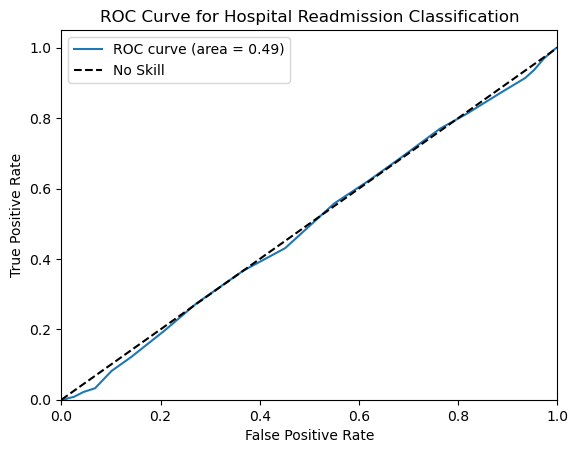

In [61]:
#Confusion Matrix
y_pred = knn.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

#Calculate Training and Testing Accuracy
print('Training Accuracy Score:', knn.score(X_train, y_train))
print('Testing Accuracy Score:', knn.score(X_test, y_test))

#Calculate AUC score
y_pred_proba = knn.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print('Area Under the Curve(AUC) score:', auc_score)

#Generate ROC Curve (GeeksforGeeks, 2024).
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Hospital Readmission Classification')
plt.legend()
plt.show()

<BR>

## D3. Code Execution <a class="anchor" id="D3"></a>

A copy of the code is submitted alongside the report, named "D209_Task_1_Leng_Yang.ipynb."

<BR>

## E1. Accuracy and AUC <a class="anchor" id="E1"></a>

The accuracy can be described as all correct predictions over the total number of predictions. As previously calculated, the model had a testing accuracy of about 63.1%. Additionally, the training accuracy was also calculated to determine if there was any overfitting. The training accuracy was 63.3%, slightly higher than the testing accuracy. Both accuracies being similar indicates that there was likely no overfitting involved.

Furthermore, the precision of predicting hospital readmissions can also be looked at. The precision measures how often a model's positive predictions are correct. Precision can be calculated by looking at the true positives over all predicted positive values. In this case, the precision is 1 out of 6, or 16.6%. With such a poor precision score, the model cannot reliably predict readmitted patients.

The area under the curve (AUC) score provides insight into a classification model's performance, with a score of 0.5 indicating a model as good as random guessing and a score of 1 indicating perfect classification ability (GeeksforGeeks, 2024). Earlier calculations resulted in an AUC score of about 0.49. This result suggests that the model performs rather poorly. It could be said that the model's predictions are as good as random guesses.

<BR>

## E2. Results and Implications <a class="anchor" id="E2"></a>

This analysis aimed to reliably predict patient readmissions using existing medical conditions and a k-NN classification model. It was expected that the model would reliably label new data with an accuracy of 95%. This resulted in a testing accuracy of 63.1%, much lower than expected. As such, the model could not reliably predict readmissions based on medical conditions alone. This could implicate that other factors in the dataset may influence hospital readmissions as well. Given a calculated AUC score of 0.49, the model is as good as random chance, thus making for an unreliable one.

Given the model's current poor performance, it could be further improved. Since no hyperparameter tuning was performed in this analysis, such tuning could improve model performance. Cross-validation could be used to determine the combination of hyperparameters that produce the highest model accuracy.

<BR>

## E3. Limitation <a class="anchor" id="E3"></a>

One of the more prominent limitations in this analysis involves the imbalance in hospital readmission rates. Of all observations in the data, only about 36.7% of patients were readmitted. This imbalance may have led the model to mislabel the less common readmission class. This can be further implicated by the confusion matrix results of the testing set, where there were 733 false negatives and only one true positive. Most predictions were wrongly classified as no readmission when there was readmission.

<BR>

## E4. Course of Action <a class="anchor" id="E4"></a>

Based on the results of this analysis, with poor accuracy and AUC scores, this k-NN classification model should not be used to predict whether new patients are at risk of hospital readmission. This could indicate that patient medical conditions alone are insufficient to determine readmissions. Thus, using another technique instead to select predictors that would significantly impact readmission rates would be recommended. Additionally, cross-validation techniques should be employed for hyperparameter tuning to choose the combination that yields the best score and for a better estimate of model evaluation, as a single use of a train-test-split method can produce a high-variance estimate of model accuracy.

<BR>

## F. Panopto Recording <a class="anchor" id="F"></a>

A recording is submitted alongside the report and can also be found at: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=6f40077e-711d-41e0-b178-b1d90105d61e

<BR>

## G. Sources for Third-Party Code <a class="anchor" id="G"></a>

GeeksforGeeks. (2024, March 8). _How to plot ROC curve in Python_. GeeksforGeeks. https://www.geeksforgeeks.org/how-to-plot-roc-curve-in-python/ 

Yang, L. (2024). _D206 PA Leng Yang Code_. [Unpublished assignment submitted for D206]. Western Governors Univeristy.

<BR>

## H. Sources <a class="anchor" id="H"></a>

Bohara, R. K. (2023, October 29). _How to find the optimal value of K in Knn?_. Medium. https://medium.com/@rkbohara097/how-to-find-the-optimal-value-of-k-in-knn-2d5177430f2a 

GeeksforGeeks. (2024, March 8). _How to plot ROC curve in Python_. GeeksforGeeks. https://www.geeksforgeeks.org/how-to-plot-roc-curve-in-python/ 

_What is the K-nearest neighbors algorithm?_. IBM. (2021, October 4). https://www.ibm.com/topics/knn 

Vishalmendekarhere. (2021, January 22). _It’s all about Assumptions, Pros & Cons_. Medium. https://medium.com/swlh/its-all-about-assumptions-pros-cons-497783cfed2d 